(a) Download the YouTube Spam Collection data set from: https://archive.ics. uci.edu/ml/datasets/YouTube+Spam+Collection. We will mainly work with the Eminem file. Note that the chronological order of the comments were kept.

## (b) Select the first ⌊0.8H⌋ of H hams and the first ⌊0.8S⌋ of S spams as your training set and the rest as your test set.

In [69]:
import pandas as pd
# read csv
df = pd.read_csv('../Data/Youtube04-Eminem.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  448 non-null    object
 1   AUTHOR      448 non-null    object
 2   DATE        203 non-null    object
 3   CONTENT     448 non-null    object
 4   CLASS       448 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 17.6+ KB


In [70]:
from sklearn.model_selection import train_test_split
# split the ham and spam cases
ham = df[df['CLASS']==0]
spam = df[df['CLASS']==1]
print("length of ham:",len(ham))
print("length of spam:",len(spam))
# separate x and y
ham_X = ham.iloc[:,:4]
ham_y = ham.iloc[:,4]
spam_X = spam.iloc[:,:4]
spam_y = spam.iloc[:,4]
# split the test and train data
ham_X_train, ham_X_test, ham_y_train, ham_y_test = train_test_split(ham_X,ham_y,train_size=0.8,shuffle=False)
spam_X_train, spam_X_test, spam_y_train, spam_y_test = train_test_split(spam_X,spam_y,train_size=0.8, shuffle=False)
# get training and test set
X_train = pd.concat([ham_X_train,spam_X_train])
y_train = pd.concat([ham_y_train,spam_y_train])
X_test = pd.concat([ham_X_test,spam_X_test])
y_test = pd.concat([ham_y_test,spam_y_test])


length of ham: 203
length of spam: 245


## (c) Represent each comment using TF-IDF features. Consider each comment a document and the whole set of comments in the file (e.g. Eminem) as the corpus.

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

train_comment = X_train['CONTENT']
test_comment = X_test['CONTENT']
corpus = pd.concat([train_comment,test_comment])
corpus_tfidf = vectorizer.fit_transform(corpus)
term = vectorizer.get_feature_names()
corpus_vec = pd.DataFrame(corpus_tfidf.toarray(),columns = term)

X_train_vec = corpus_vec[:358]
X_test_vec = corpus_vec[358:]
X_train_vec

,00,000,047000,09,10,100,1000,100877300245414,11,12,...,youtube,youtuber,youtubers,yrs,ytma,yuliya,yuttx04oyqq,zesty,zip,zonepa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.579294,0.0,0.0,0.0
355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [72]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# # represent train comment
# train_comment = X_train["CONTENT"]
# vectorizer = TfidfVectorizer()
# train_tfidf = vectorizer.fit_transform(train_comment)
# term_train = vectorizer.get_feature_names()
# print("TF-IDF of training set")
# X_train = pd.DataFrame(train_tfidf.toarray(),columns = term_train)

In [88]:
# represent test comment
# print("TF-IDF of test set")
# test_comment = X_test["CONTENT"]
# term_test = vectorizer.get_feature_names()
# test_tfidf = vectorizer.fit_transform(test_comment)
# term_test = vectorizer.get_feature_names()
# X_test = pd.DataFrame(test_tfidf.toarray(),columns=term_test)
# X_test

TF-IDF of test set


,00,1000,11,12year,14,15,1990,200,2005,2013,...,yahoo,yall,year,you,young,your,yourself,youtube,youtuber,yrs
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.568499,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.429571,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.235110,0.0,0.261718,0.154071,0.0,0.0,0.000000
86,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
87,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
88,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.175526,0.0,0.000000,0.000000,0.0,0.0,0.000000


## (d) L2-penalized Logistic Regression
## i. Determine λ using five fold cross-validation on your training set. Consider log10 λ ∈ {−5,−4,...,5}.
## ii. Train L2-penalized Logistic Regression using the λ you found in 1(e)i. Calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for your training set.

In [73]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
logistic = linear_model.LogisticRegression()
penalty = ['l2']
# use c for lambda
c = [1/pow(10,i) for i in range(-5,6)]
parameters = {"C":c,"penalty":penalty}
# cross validation
gridcv = GridSearchCV(logistic,parameters,cv=5,n_jobs=-1)

best_model = gridcv.fit(X_train_vec,y_train)
best_c = best_model.best_estimator_.get_params()['C']
print("Best C: ",best_c)
print("Best λ:",1/best_c)
train_pred = best_model.predict(X_train_vec)
train_pred

Best C:  100.0
Best λ: 0.01


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [74]:
from sklearn import metrics
print("Confusion matrix:")
print(metrics.confusion_matrix(y_train,train_pred))
print()
print("Accuracy score:", metrics.accuracy_score(y_train,train_pred))
print("Rrecision, Recall, F1 score")
print(metrics.classification_report(y_train,train_pred))


Confusion matrix:
[[162   0]
 [  0 196]]

Accuracy score: 1.0
Rrecision, Recall, F1 score
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       196

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



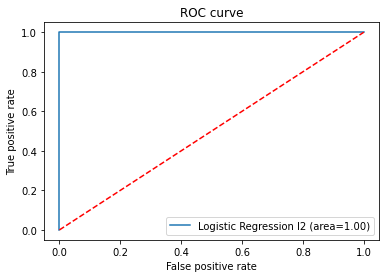

In [75]:
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_train,train_pred.reshape(-1,1),pos_label=1)
l2_roc_auc = metrics.roc_auc_score(y_train,train_pred.reshape(-1,1))
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression l2 (area=%0.2f)' % l2_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

## iii. Test the algorithm on the test set and calculate the confusion matrix, accu- racy, precision, recall, and F1 score as well as the ROC curve and AUC for the test set. Which one is more important in this application, precision or recall? Calculate Fβ score for β ∈ {0.1, 0.5, .9, 1, 5, 10}.

In [77]:
test_pred = best_model.predict(X_test_vec)
test_pred
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test,test_pred))
print()
print("accuracy score: ", metrics.accuracy_score(y_test,test_pred))
print("Rrecision, Recall, F1 score")
print(metrics.classification_report(y_test,test_pred))

Confusion matrix:
[[40  1]
 [ 1 48]]

accuracy score:  0.9777777777777777
Rrecision, Recall, F1 score
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.98      0.98      0.98        49

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



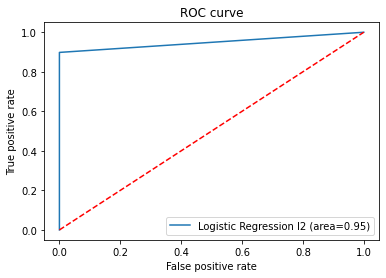

In [13]:
fpr, tpr, _ = metrics.roc_curve(y_test,test_pred.reshape(-1,1),pos_label=1)
l2_roc_auc = metrics.roc_auc_score(y_test,test_pred.reshape(-1,1))
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression l2 (area=%0.2f)' % l2_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

Precision is the number of true positives in predicted positives
Recall is the number of positives that are predicted correctly in all actual positives
In this case, precision is more important because we don't want to filter out comments that are not spams.

In [35]:
print("Fβ score:")
for i in [0.1,0.5,0.9,1,5,10]:
    fbeta = metrics.fbeta_score(y_test,test_pred,beta=i)
    print("When β =",i,"Fβ score is",round(fbeta,3))

Fβ score:
When β = 0.1 Fβ score is 0.999
When β = 0.5 Fβ score is 0.978
When β = 0.9 Fβ score is 0.952
When β = 1 Fβ score is 0.946
When β = 5 Fβ score is 0.901
When β = 10 Fβ score is 0.899


## (e) L1-penalized Logistic Regression
## i. Determine λ using five fold cross-validation on your training set. Consider log10 λ ∈ {−5,−4,...,5}.
## ii. Train L1-penalized Logistic Regression using the λ you found in 1(e)i. Cal- culate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for your training set.

In [41]:
logistic_l1 = linear_model.LogisticRegression()
penalty = ['l1']
# use c for lambda
c = [1/pow(10,i) for i in range(-5,6)]
parameters = {"C":c,"penalty":penalty,"solver":['liblinear']}
# cross validation
gridcv = GridSearchCV(logistic_l1,parameters,cv=5,n_jobs=-1)

best_model_l1 = gridcv.fit(X_train_vec,y_train)
best_c_l1 = best_model_l1.best_estimator_.get_params()['C']
print("Best C: ",best_c_l1)
print("Best λ:",1/best_c_l1)
train_pred = best_model_l1.predict(X_train_vec)
train_pred

Best C:  10000.0
Best λ: 0.0001


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [78]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_train,train_pred))
print()

print("accuracy score: ", metrics.accuracy_score(y_train,train_pred))
print("Rrecision, Recall, F1 score")
print(metrics.classification_report(y_train,train_pred))

Confusion matrix:
[[162   0]
 [  0 196]]

accuracy score:  1.0
Rrecision, Recall, F1 score
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       196

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



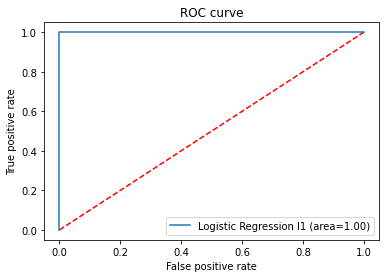

In [43]:
fpr, tpr, _ = metrics.roc_curve(y_train,train_pred.reshape(-1,1),pos_label=1)
l1_roc_auc = metrics.roc_auc_score(y_train,train_pred.reshape(-1,1))
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression l1 (area=%0.2f)' % l1_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

## iii. Test the algorithm on the test set and calculate the confusion matrix, accu- racy, precision, recall, and F1 score as well as the ROC curve and AUC for the test set.

In [44]:
test_pred = best_model_l1.predict(X_test_vec)
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test,test_pred))
print()
print("Accuracy score:", metrics.accuracy_score(y_test,test_pred))
print("Rrecision, Recall, F1 score")
print(metrics.classification_report(y_test,test_pred))

Confusion matrix:
[[40  1]
 [ 3 46]]

Accuracy score: 0.9555555555555556
Rrecision, Recall, F1 score
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.98      0.94      0.96        49

    accuracy                           0.96        90
   macro avg       0.95      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



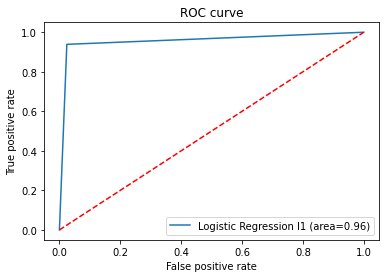

In [45]:
fpr, tpr, _ = metrics.roc_curve(y_test,test_pred.reshape(-1,1),pos_label=1)
l1_roc_auc = metrics.roc_auc_score(y_test,test_pred.reshape(-1,1))
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression l1 (area=%0.2f)' % l1_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

## (f) Binary Classification Using Na ̈ıve Bayes’ Classifiers
## i. Solve the problem using a Na ̈ıve Bayes’ classifier. Use Gaussian class condi- tional distributions. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets.

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# fit the model using the training set
gnb.fit(X_train_vec,y_train)

# predictions for the training set
train_pred = gnb.predict(X_train_vec)
print("Results for the NB training set")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_train,train_pred))
print()
print("Accuracy score:", metrics.accuracy_score(y_train,train_pred))
print("Rrecision, Recall, F1 score")
print(metrics.classification_report(y_train,train_pred))

Results for the NB training set
Confusion matrix:
[[162   0]
 [  1 195]]

Accuracy score: 0.9972067039106145
Rrecision, Recall, F1 score
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       162
           1       1.00      0.99      1.00       196

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



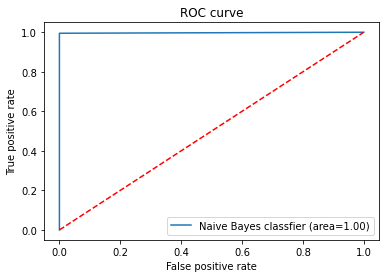

In [58]:
fpr, tpr, _ = metrics.roc_curve(y_train,train_pred.reshape(-1,1),pos_label=1)
nb_roc_auc = metrics.roc_auc_score(y_train,train_pred.reshape(-1,1))
plt.figure()
plt.plot(fpr,tpr,label='Naive Bayes classfier (area=%0.2f)' % nb_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

In [49]:
# predictions for the testing set
test_pred = gnb.predict(X_test_vec)

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test,test_pred))
print()
print("Accuracy score:", metrics.accuracy_score(y_test,test_pred))
print("Rrecision, Recall, F1 score")
print(metrics.classification_report(y_test,test_pred))

Confusion matrix:
[[35  6]
 [ 1 48]]

Accuracy score: 0.9222222222222223
Rrecision, Recall, F1 score
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        41
           1       0.89      0.98      0.93        49

    accuracy                           0.92        90
   macro avg       0.93      0.92      0.92        90
weighted avg       0.93      0.92      0.92        90



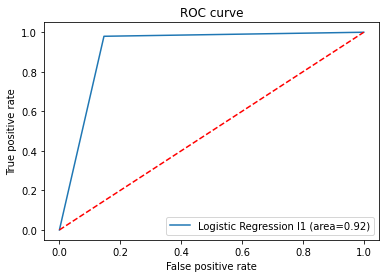

In [50]:
fpr, tpr, _ = metrics.roc_curve(y_test,test_pred.reshape(-1,1),pos_label=1)
l1_roc_auc = metrics.roc_auc_score(y_test,test_pred.reshape(-1,1))
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression l1 (area=%0.2f)' % l1_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

## (g) (Extra Credit, 5 points) Repeat 1(f)i using multinomial priors

In [62]:
from sklearn.naive_bayes import MultinomialNB
multiNB = MultinomialNB()
multiNB.fit(X_train_vec,y_train)

multiNB_train_pred = multiNB.predict(X_train_vec)

print("Results for the multinomial NB training set")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_train,multiNB_train_pred))
print()

print("Accuracy score:", metrics.accuracy_score(y_train,multiNB_train_pred))
print("Rrecision, Recall, F1 score")
print(metrics.classification_report(y_train,multiNB_train_pred))

Results for the multinomial NB training set
Confusion matrix:
[[154   8]
 [  0 196]]

Accuracy score: 0.9776536312849162
Rrecision, Recall, F1 score
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       162
           1       0.96      1.00      0.98       196

    accuracy                           0.98       358
   macro avg       0.98      0.98      0.98       358
weighted avg       0.98      0.98      0.98       358



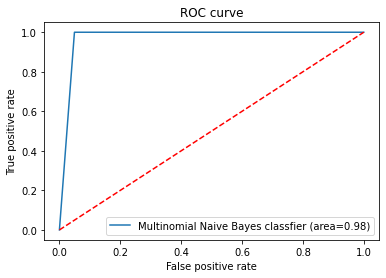

In [63]:
fpr, tpr, _ = metrics.roc_curve(y_train,multiNB_train_pred.reshape(-1,1),pos_label=1)
nb_roc_auc = metrics.roc_auc_score(y_train,multiNB_train_pred.reshape(-1,1))
plt.figure()
plt.plot(fpr,tpr,label='Multinomial Naive Bayes classfier (area=%0.2f)' % nb_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

In [64]:
# predictions for the testing set
multiNB_test_pred = multiNB.predict(X_test_vec)

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test,multiNB_test_pred))
print()
print("Accuracy score:", metrics.accuracy_score(y_test,multiNB_test_pred))
print("Rrecision, Recall, F1 score")
print(metrics.classification_report(y_test,multiNB_test_pred))

Confusion matrix:
[[33  8]
 [ 0 49]]

Accuracy score: 0.9111111111111111
Rrecision, Recall, F1 score
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        41
           1       0.86      1.00      0.92        49

    accuracy                           0.91        90
   macro avg       0.93      0.90      0.91        90
weighted avg       0.92      0.91      0.91        90



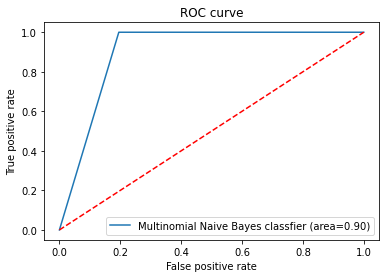

In [68]:
fpr, tpr, _ = metrics.roc_curve(y_test,multiNB_test_pred.reshape(-1,1),pos_label=1)
nb_roc_auc = metrics.roc_auc_score(y_test,multiNB_test_pred.reshape(-1,1))
plt.figure()
plt.plot(fpr,tpr,label='Multinomial Naive Bayes classfier (area=%0.2f)' % nb_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

## Create one table for each of the five data sets: Shakira, Eminem, LMFAO, KatyPerry, and Psy 
to compare accuracy, precision, recall, F1, score and AUC of L1-penalized and L2-penalized logistic regression, Na ̈ıve Bayes’ with Gaussian and multinomial priors for the test sets. 
Use the first ⌊0.8H⌋ of H hams and the first ⌊0.8S⌋ of S spams as your training set and the rest as your test set. Show the best score in each column using boldface. A hypothetical table is shown below:

In [147]:
# create a for loop
l=['Youtube01-Psy','Youtube02-KatyPerry','Youtube03-LMFAO','Youtube04-Eminem','Youtube05-Shakira']
for i in range(0,len(l)):
    print('Data set: '+l[i])
    
    # create a data frame for each one
    df_result = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1','AUC'],index=['NB-Gaussian','NB-Multinomial','l2','l1'])

    # read csv
    path = '../Data/'+l[i]+'.csv'
    df = pd.read_csv(path)
    
    # split the ham and spam cases
    ham = df[df['CLASS']==0]
    spam = df[df['CLASS']==1]

    # separate x and y
    ham_X = ham.iloc[:,:4]
    ham_y = ham.iloc[:,4]
    spam_X = spam.iloc[:,:4]
    spam_y = spam.iloc[:,4]
    # split the test and train data
    ham_X_train, ham_X_test, ham_y_train, ham_y_test = train_test_split(ham_X,ham_y,train_size=0.8,shuffle=False)
    spam_X_train, spam_X_test, spam_y_train, spam_y_test = train_test_split(spam_X,spam_y,train_size=0.8, shuffle=False)
    # get training and test set
    X_train = pd.concat([ham_X_train,spam_X_train])
    y_train = pd.concat([ham_y_train,spam_y_train])
    X_test = pd.concat([ham_X_test,spam_X_test])
    y_test = pd.concat([ham_y_test,spam_y_test])
    
    len_X_train = len(X_train)
    len_X_test = len(X_test)
    print("length of X_train:",len_X_train)
    print("length of X_test:",len_X_test)
    
    # create tfidf
    vectorizer = TfidfVectorizer()
    train_comment = X_train['CONTENT']
    test_comment = X_test['CONTENT']
    corpus = pd.concat([train_comment,test_comment])
    corpus_tfidf = vectorizer.fit_transform(corpus)
    term = vectorizer.get_feature_names()
    corpus_vec = pd.DataFrame(corpus_tfidf.toarray(),columns = term)

    X_train_vec = corpus_vec[:len_X_train]
    X_test_vec = corpus_vec[len_X_train:]

    # l2 regression
    logistic = linear_model.LogisticRegression()
    penalty = ['l2']
    # use c for lambda
    c = [1/pow(10,i) for i in range(-5,6)]
    parameters = {"C":c,"penalty":penalty}
    # cross validation
    gridcv = GridSearchCV(logistic,parameters,cv=5,n_jobs=-1)

    best_model = gridcv.fit(X_train_vec,y_train)
    best_c = best_model.best_estimator_.get_params()['C']
    test_pred = best_model.predict(X_test_vec)
    
    accuracy = metrics.accuracy_score(y_test,test_pred)
    precision = metrics.precision_score(y_test,test_pred)
    recall = metrics.recall_score(y_test,test_pred)
    f1 = metrics.f1_score(y_test,test_pred)
    auc = metrics.roc_auc_score(y_test,test_pred)
    
    df_result.loc['l2'] = [accuracy, precision, recall, f1, auc]
    

    #l1
    logistic_l1 = linear_model.LogisticRegression()
    penalty = ['l1']
    # use c for lambda
    c = [1/pow(10,i) for i in range(-5,6)]
    parameters = {"C":c,"penalty":penalty,"solver":['liblinear']}
    # cross validation
    gridcv = GridSearchCV(logistic_l1,parameters,cv=5,n_jobs=-1)

    best_model_l1 = gridcv.fit(X_train_vec,y_train)
    best_c_l1 = best_model_l1.best_estimator_.get_params()['C']

    test_pred = best_model_l1.predict(X_test_vec)
    
    accuracy = metrics.accuracy_score(y_test,test_pred)
    precision = metrics.precision_score(y_test,test_pred)
    recall = metrics.recall_score(y_test,test_pred)
    f1 = metrics.f1_score(y_test,test_pred)
    auc = metrics.roc_auc_score(y_test,test_pred)
    
    df_result.loc['l1'] = [accuracy, precision, recall, f1, auc]
    
    #NB-Gaussian
    gnb = GaussianNB()
    # fit the model using the training set
    gnb.fit(X_train_vec,y_train)
    test_pred = gnb.predict(X_test_vec)
    
    accuracy = metrics.accuracy_score(y_test,test_pred)
    precision = metrics.precision_score(y_test,test_pred)
    recall = metrics.recall_score(y_test,test_pred)
    f1 = metrics.f1_score(y_test,test_pred)
    auc = metrics.roc_auc_score(y_test,test_pred)
    df_result.loc['NB-Gaussian'] = [accuracy, precision, recall, f1, auc]
    
    #NB-Multinomial
    multiNB = MultinomialNB()
    multiNB.fit(X_train_vec,y_train)

    multiNB_test_pred = multiNB.predict(X_test_vec)
    
    accuracy = metrics.accuracy_score(y_test,multiNB_test_pred)
    precision = metrics.precision_score(y_test,multiNB_test_pred)
    recall = metrics.recall_score(y_test,multiNB_test_pred)
    f1 = metrics.f1_score(y_test,multiNB_test_pred)
    auc = metrics.roc_auc_score(y_test,multiNB_test_pred)
    df_result.loc['NB-Multinomial'] = [accuracy, precision, recall, f1, auc]
    
    print(df_result)
    print()

Data set: Youtube01-Psy
length of X_train: 280
length of X_test: 70
                Accuracy Precision    Recall        F1       AUC
NB-Gaussian     0.857143  0.857143  0.857143  0.857143  0.857143
NB-Multinomial  0.957143  0.944444  0.971429  0.957746  0.957143
l2              0.985714  0.972222         1  0.985915  0.985714
l1              0.957143  0.944444  0.971429  0.957746  0.957143

Data set: Youtube02-KatyPerry
length of X_train: 280
length of X_test: 70
                Accuracy Precision    Recall        F1       AUC
NB-Gaussian     0.857143  0.820513  0.914286  0.864865  0.857143
NB-Multinomial  0.914286  0.939394  0.885714  0.911765  0.914286
l2              0.914286  0.967742  0.857143  0.909091  0.914286
l1              0.957143  0.970588  0.942857  0.956522  0.957143

Data set: Youtube03-LMFAO
length of X_train: 349
length of X_test: 89
                Accuracy Precision    Recall        F1       AUC
NB-Gaussian     0.898876  0.953488  0.854167  0.901099  0.902693
NB-Mul